# [AICE Professional 문제풀이 특강] (Tabular) 통신사 이탈 여부 예측
+ AICE Professioanl 문제 풀이 특강 입니다.
+ 통신사 이탈 데이터로 가지고 데이터 읽고, 전처리 하고
+ 학습셋과 검증셋 나누고
+ 머신러닝 모델 학습 및 예측 , 평가 수행
+ 딥러닝 모델 학습 및 예측 , 평가 수행
+ 오버샘플링을 통한 데이터 증감 및 딥러닝 모델 학습, 예측 , 평가 순으로 진행합니다.

##  
# 0. 실습 내용 확인

## <font color=blue> **머신러닝, 딥러닝을 사용한 통신 서비스 이탈 예측** </font>
### 모든 관련 고객 데이터를 분석하고 강력하고 정확한 이탈 예측 모델을 개발하여 고객을 유지하고 고객 이탈률을 줄이기 위한 전략을 수립합니다.
### Churn은 서비스를 중단하거나 업계의 경쟁업체로 이전한 고객 또는 사용자를 의미합니다. 모든 조직이 기존 고객을 유지하고 새로운 고객을 유치하는 것이 매우 중요합니다. 그 중 하나가 실패하면 비즈니스에 좋지 않습니다. 목표는 업계에서 경쟁 우위를 유지하기 위해 이탈 예측을 위한 머신러닝, 딥러닝의 가능성을 탐색하는 것입니다.

#  
## 1. 기본 라이브러리 임포트 및 파일 읽어오기

In [ ]:
# numpy, pandas, seaborn, matplotlib 임포트
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 'https://github.com/gzone1357/Image1/raw/main/telco_churn_data_v1.csv' 파일 읽고 df 변수 저장
df = pd.read_csv('https://github.com/gzone1357/Image1/raw/main/telco_churn_data_v1.csv')
df.head(3)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,1090-PYKCI,Female,0.0,Yes,Yes,69,Yes,Yes,Fiber optic,Yes,...,Yes,Yes,Yes,No,One year,Yes,Credit card (automatic),105.10,7234.8,No
1,5835-BEQEU,Male,0.0,No,No,3,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,76.95,228.4,Yes
2,9943-VSZUV,Male,1.0,No,No,67,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,75.70,5060.85,No


#  
## 2. EDA (Exploratory Data Analysis) 탐색적 데이터 분석
- customerID 모델링하는데 도움 안됨 확인!!
- TotalCharges 컬럼의 타입 : object형 --> float 형으로 변경 필요

In [ ]:
# EDA 분석 : info

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7034 non-null   object 
 2   SeniorCitizen     7042 non-null   float64
 3   Partner           7043 non-null   object 
 4   Dependents        7041 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7040 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  3580 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7042 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [ ]:
# describe
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7042.000000,7043.000000,7042.000000
mean,0.162170,32.371149,64.763256
std,0.368633,24.559481,30.091898
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [ ]:
# customerID 모델링하는데 도움 안됨 확인!! : 삭제
df.drop('customerID', axis=1, inplace=True)


In [ ]:
# TotalCharges 컬럼의 타입 : object형 --> float 형으로 변경 필요
# df['TotalCharges'].astype('float') 수행시 에러 발생. 공백 문자열 데이터 존재 하므로 제거후 타입 변경 수행

# Boolean Indexing
cond = (df['TotalCharges'] == ' ')
df = df[~cond]

# float 타입 변경
df['TotalCharges'] = df['TotalCharges'].astype('float')
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7023 non-null   object 
 1   SeniorCitizen     7031 non-null   float64
 2   Partner           7032 non-null   object 
 3   Dependents        7030 non-null   object 
 4   tenure            7032 non-null   int64  
 5   PhoneService      7029 non-null   object 
 6   MultipleLines     7032 non-null   object 
 7   InternetService   7032 non-null   object 
 8   OnlineSecurity    7032 non-null   object 
 9   OnlineBackup      7032 non-null   object 
 10  DeviceProtection  3573 non-null   object 
 11  TechSupport       7032 non-null   object 
 12  StreamingTV       7032 non-null   object 
 13  StreamingMovies   7032 non-null   object 
 14  Contract          7031 non-null   object 
 15  PaperlessBilling  7032 non-null   object 
 16  PaymentMethod     7031 non-null   object 
 17  

<ipython-input-55-c9d08d750f22>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['TotalCharges'] = df['TotalCharges'].astype('float')


#   
## 3. Null 데이터 확인 및 처리
- Null 처리하는 방법 : Null 삭제, 채우기
- Null 처리하는 방법에는 정답이 없다!!
- 어떤 영향을 미칠지 고려해서 처리해야 한다.

In [ ]:
# isnull 함수 활용하여 컬럼별 null 개수 확인
df.isnull().sum()

,0
gender,9
SeniorCitizen,1
Partner,0
Dependents,2
tenure,0
PhoneService,3
MultipleLines,0
InternetService,0
OnlineSecurity,0
OnlineBackup,0


In [ ]:
# DeviceProtection : null 많아서 컬럼 삭제
df.drop('DeviceProtection', axis=1, inplace=True)

In [ ]:
# 나머지 결측치는 몇개 안되어서 삭제
df.dropna(inplace=True)

df.isnull().sum().sum()

0

#  
## 4. 시각화

<Axes: xlabel='Churn', ylabel='count'>

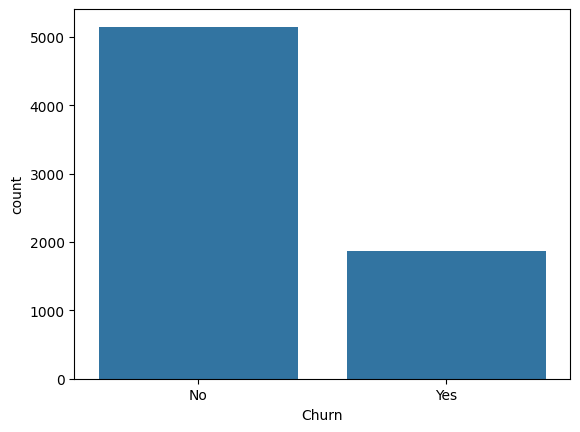

In [ ]:
# 종속변수 churn 컬럼에 대해서 seaborn countplot 으로 분포 확인
# 불균형 데이터

sns.countplot(data=df, x='Churn')

<Axes: >

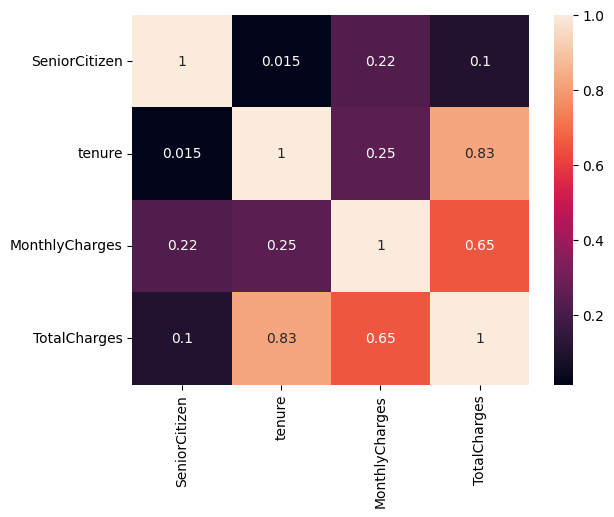

In [ ]:
# 변수의 상관계수에 대해서 heatmap 그리기
# 먼저, number 컬럼에 대해서 heatmap 수행해야 함.
# 특별히, 다중공선성 보이지 않음 : 다중공선성 있다고 삭제하는것은 답이 아니다. 그래서 쉽지 않다.!!

corr = df.select_dtypes('number').corr()
sns.heatmap(corr , annot=True)

#   
## 5. 범주형 데이터 더미화

In [ ]:
# select_dtypes 활용하여 Object 컬럼명 저장 : cal_cols

cal_cols = df.select_dtypes('object').columns.values
cal_cols

array(['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'Churn'], dtype=object)

In [ ]:
# Pandas get_dummies() 함수 이용하여 원-핫-인코딩(더미화) 수행

df = pd.get_dummies(data=df, columns=cal_cols, drop_first=True)

In [ ]:
 df.head(3)

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,...,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn_Yes
0,0.0,69,105.10,7234.80,False,True,True,True,False,True,...,True,False,False,True,False,True,True,False,False,False
1,0.0,3,76.95,228.40,True,False,False,True,False,True,...,False,False,False,False,False,True,False,True,False,True
2,1.0,67,75.70,5060.85,True,False,False,True,False,True,...,False,False,False,False,False,True,False,False,True,False


#   
## 6.Train, Test  데이터셋 분할

In [ ]:
# X, y(Churn_Yes) 나누기

X = df.drop('Churn_Yes', axis=1)
y = df['Churn_Yes']

In [ ]:
# 학습셋과 검증셋 나누기 : 분류이므로 stratify 필수
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=42)

In [ ]:
X_train.shape, X_test.shape

((4911, 28), (2105, 28))

#   
## 7.데이터 정규화/스케일링(Normalizing/Scaling)
- 스케일링 꼭 해야 하는가?
- 스케일링시 모델 성능에 도움이 된다고 하지만, 꼭 한다고 해서 성능이 좋아지지 않을수 있다.

In [ ]:
# StandardScaler 수행
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
X_train = ss.fit_transform(X_train)
X_test = ss.transform(X_test)

#   
## 8. 머신러닝 모델
- 하이퍼 파라미터 설정 안함
- 하이퍼 파라미터 튜닝이 필요한가?
- 하이퍼 파라미터 튜닝을 어떻게 할것인가?  GridSearchCV 사용

In [ ]:
# 분류 모델 성능 측정 필요 라이브러리
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import classification_report

##### LogisticRegression 모델

In [ ]:
# LogisticRegression 함수 모델 정의 , 학습 , 예측 --> accuracy_score

from sklearn.linear_model import LogisticRegression

lg = LogisticRegression()
lg.fit(X_train, y_train)
lg_pred = lg.predict(X_test)
accuracy_score(y_test, lg_pred)

0.804750593824228

#### KNN (K-Nearest Neighbor)

In [ ]:
# KNeighborsClassifier 함수 모델 정의 , 학습 , 예측 --> accuracy_score

from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
knn_pred = knn.predict(X_test)
accuracy_score(y_test, knn_pred)

0.7729216152019003

#### 결정트리(DecisionTree)

In [ ]:
# DecisionTreeClassifier 함수 모델 정의 , 학습 , 예측 --> accuracy_score

from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
dt_pred = dt.predict(X_test)
accuracy_score(y_test, dt_pred)

0.7192399049881235

#### 랜덤포레스트(RandomForest)

In [ ]:
# RandomForestClassifier 함수 모델 정의 , 학습 , 예측 --> accuracy_score

from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)
rfc_pred = rfc.predict(X_test)
accuracy_score(y_test, rfc_pred)

0.7890736342042756

#### XGBoost

In [ ]:
# XGBClassifier 함수 모델 정의 , 학습 , 예측 --> accuracy_score

from xgboost import XGBClassifier

xgb = XGBClassifier()
xgb.fit(X_train, y_train)
xgb_pred = xgb.predict(X_test)
accuracy_score(y_test, xgb_pred)

0.7743467933491687

#### LGBM

In [ ]:
# LGBMClassifier 함수 모델 정의 , 학습 , 예측 --> accuracy_score

from lightgbm import LGBMClassifier

lgbm = LGBMClassifier()
lgbm.fit(X_train, y_train)
lgbm_pred = lgbm.predict(X_test)
accuracy_score(y_test, lgbm_pred)

/usr/local/lib/python3.10/dist-packages/dask/dataframe/__init__.py:42: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)


[LightGBM] [Info] Number of positive: 1306, number of negative: 3605
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001973 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 658
[LightGBM] [Info] Number of data points in the train set: 4911, number of used features: 28
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.265934 -> initscore=-1.015353
[LightGBM] [Info] Start training from score -1.015353


0.7947743467933491

##  
## <font color=red> [주의] 재현율 성능이 너무 안나온다.</font>

In [ ]:
# 재현율의 성능이 잘 안나온다!!
print(classification_report(y_test, lgbm_pred))

              precision    recall  f1-score   support

       False       0.83      0.90      0.87      1545
        True       0.64      0.51      0.57       560

    accuracy                           0.79      2105
   macro avg       0.74      0.70      0.72      2105
weighted avg       0.78      0.79      0.79      2105



#   
## 9 딥러닝 심층신경망(DNN) 모델

In [ ]:
# 딥러닝 라이브러리 임포트
import tensorflow as tf
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

tf.random.set_seed(100)

In [ ]:
# Sequential() 모델 생성

model = Sequential()
model.add(Dense(32, activation='relu', input_shape=(X_train.shape[-1], )))
model.add(BatchNormalization())
model.add(Dense(16, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_2 (Dense)                      │ (None, 32)                  │             928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 32)                  │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 16)                  │             528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 16)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 1)                   │              17 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,601 (6.25 KB)

 Trainable params: 1,537 (6.00 KB)

 Non-trainable params: 64 (256.00 B)

In [ ]:
# 모델 컴파일
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
# EarlyStopping 활용 : val_loss 모니터링해서 성능이 5번 지나도록 좋아지지 않으면 조기 종료
# ModelCheckpoint 활용 : val_loss 가장 낮은 값을 가질때마다 모델저장

early_stop = EarlyStopping(monitor='val_loss', verbose=1, patience=5)
check_point = ModelCheckpoint('best_model.keras', verbose=1, monitor='val_loss', save_best_only=True)

In [ ]:
# 모델 학습
history = model.fit(X_train, y_train, epochs=50 , batch_size=16, validation_data=(X_test, y_test), callbacks=[early_stop, check_point])

Epoch 1/50
295/307 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5841 - loss: 0.7248
Epoch 1: val_loss improved from inf to 0.45176, saving model to best_model.keras
307/307 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.5876 - loss: 0.7201 - val_accuracy: 0.7857 - val_loss: 0.4518
Epoch 2/50
301/307 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7548 - loss: 0.4861
Epoch 2: val_loss improved from 0.45176 to 0.43598, saving model to best_model.keras
307/307 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7552 - loss: 0.4860 - val_accuracy: 0.7910 - val_loss: 0.4360
Epoch 3/50
281/307 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7811 - loss: 0.4585
Epoch 3: val_loss improved from 0.43598 to 0.42846, saving model to best_model.keras
307/307 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7810 - loss: 0.4588 - val_accuracy: 0.7971 - val_loss: 0.4285
Epoch 4/50
293/307 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7789 - loss: 0.4572
Epoch 4: val_loss improved from 0.42846 to 0.42581, sa

In [ ]:
# load_model 활용하여 'best_model.keras' 최적 모델 로드

best_model = load_model('best_model.keras')

In [ ]:
# best_model 예측 및 정확도/재현율 확인 : 80% 정확도, 49% 재현율

pred_best_model = best_model.predict(X_test)

pred_result = []
for pred in pred_best_model:
  if pred > 0.5 :
    pred_result.append(1)
  else :
    pred_result.append(0)

print( accuracy_score(y_test, pred_result) )
print( recall_score(y_test, pred_result) )

66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
0.804750593824228
0.4857142857142857


####  
### 10. SMOTE 함수 이용하여 Oversampling

In [ ]:
# SMOTE 함수 정의 및 Oversampling 수행
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=0)
X_train_over, y_train_over = smote.fit_resample(X_train, y_train)

In [ ]:
print('SMOTE 적용 전 학습용 피처/레이블 데이터 세트: ', X_train.shape, y_train.shape)
print('SMOTE 적용 후 학습용 피처/레이블 데이터 세트: ', X_train_over.shape, y_train_over.shape)

SMOTE 적용 전 학습용 피처/레이블 데이터 세트:  (4911, 28) (4911,)
SMOTE 적용 후 학습용 피처/레이블 데이터 세트:  (7210, 28) (7210,)


In [ ]:
# SMOTE 적용 후 레이블 값 분포 : 0과 1 갯수가 동일
pd.Series(y_train_over).value_counts()

,count
Churn_Yes,
False,3605
True,3605


####  
### 모델 개발(Creating the Model)

In [ ]:
model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(X_train.shape[-1],)))
model.add(Dropout(0.3))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(16, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(2, activation='softmax'))

# 모델 컴파일
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# 조기종료
early_stop = EarlyStopping(monitor='val_accuracy', verbose=1, patience=5)

# 모델 체크 포인트
check_point = ModelCheckpoint('best_model.keras', verbose=1, monitor='val_loss', save_best_only=True)

# 모델 학습
history = model.fit(X_train_over, y_train_over, epochs=50 , batch_size=32, validation_data=(X_test, y_test), callbacks=[early_stop, check_point])

Epoch 1/50
204/226 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5983 - loss: 0.6696
Epoch 1: val_loss improved from inf to 0.48793, saving model to best_model.keras
226/226 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.6055 - loss: 0.6635 - val_accuracy: 0.7420 - val_loss: 0.4879
Epoch 2/50
210/226 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7353 - loss: 0.5388
Epoch 2: val_loss improved from 0.48793 to 0.47375, saving model to best_model.keras
226/226 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7362 - loss: 0.5378 - val_accuracy: 0.7530 - val_loss: 0.4738
Epoch 3/50
224/226 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7551 - loss: 0.5211
Epoch 3: val_loss improved from 0.47375 to 0.46093, saving model to best_model.keras
226/226 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7551 - loss: 0.5209 - val_accuracy: 0.7591 - val_loss: 0.4609
Epoch 4/50
201/226 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7573 - loss: 0.5068
Epoch 4: val_loss improved from 0.46093 to 0.46000, sa

In [ ]:
# 모델 예측 및 정확도/재현율 확인
pred = model.predict(X_test)
y_pred = np.argmax(pred, axis=1)

# 정확도, 재현율 확인
print( accuracy_score(y_test, y_pred) )
print( recall_score(y_test, y_pred) )

66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
0.7648456057007126
0.7321428571428571


<br>
<br>
<br>
<br>

# 배운 내용 정리
1. 통신사 이탈 데이터 읽어오고
2. 결측치 전처리하고
3. 학습셋, 검증셋 나누고
4. 여러가지 머신러닝 모델과 딥러닝 모델 학습
5. 정답 레이블이 불균형이어서 SMOTE 통한 오버샘플링 적용
9. 추가로 고민할 사항입니다.
  - 검증셋 성능이 높다고 채점 점수가 잘 나올까?
  - 결측치 처리 방법 삭제하거나 채우기 중 어느것이 성능이 좋을까?
  - 스케일링을 하는게 좋을까? 하지 않았을때의 성능은?
  - 스케일링을 하면 어느 스케일링이 더 좋을까?
  - 퓨쳐엔지니어링은 해야 되나? 말아야 되나?
  - 최적 파라미터를 찾을수 있을까? GridSearchCV 등을 해야 하나?